## Importación modulos y dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
data = pd.read_csv("../data/conchillas_listo.csv", sep=",", low_memory=False)

In [4]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,Ratio_LE_AE,Ratio_LT_AT,Ratio_LA_AA,Ratio_LE_LT,Ratio_AE_AT,Ratio_LA_LT,Ratio_AA_AT,Ratio_LE_LA,Ratio_AE_AA
0,96,5,6.18,1.83,13.57,10.00,8.10,6.04,5.15,LU,0.296117,0.736920,0.745679,0.183000,0.455416,0.604000,0.596905,0.302980,0.762963
1,96,5,6.16,1.83,13.66,10.08,8.16,6.13,5.12,LU,0.297078,0.737921,0.751225,0.181548,0.450952,0.608135,0.597365,0.298532,0.754902
2,96,5,6.14,1.81,13.61,10.01,8.20,6.14,5.10,LU,0.294788,0.735489,0.748780,0.180819,0.451139,0.613387,0.602498,0.294788,0.748780
3,96,5,6.18,1.82,13.85,10.07,8.16,6.14,5.09,LU,0.294498,0.727076,0.752451,0.180735,0.446209,0.609732,0.589170,0.296417,0.757353
4,96,6,6.58,2.16,11.69,9.10,6.56,4.92,5.49,LU,0.328267,0.778443,0.750000,0.237363,0.562874,0.540659,0.561163,0.439024,1.003049


In [5]:
data.dtypes

Lote             int64
Individuo        int64
AE             float64
LE             float64
AT             float64
LT             float64
AA             float64
LA             float64
NV             float64
Morfotipo       object
Ratio_LE_AE    float64
Ratio_LT_AT    float64
Ratio_LA_AA    float64
Ratio_LE_LT    float64
Ratio_AE_AT    float64
Ratio_LA_LT    float64
Ratio_AA_AT    float64
Ratio_LE_LA    float64
Ratio_AE_AA    float64
dtype: object

## Prueba Kmeans

### Con todas las variables iniciales

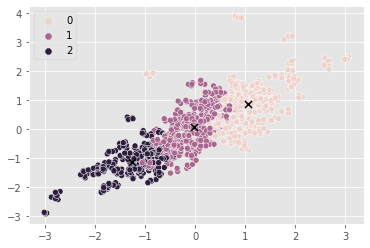

In [6]:
x = data[['AE','LE','AT','LT','AA','LA','NV']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x);

kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=labels,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans')

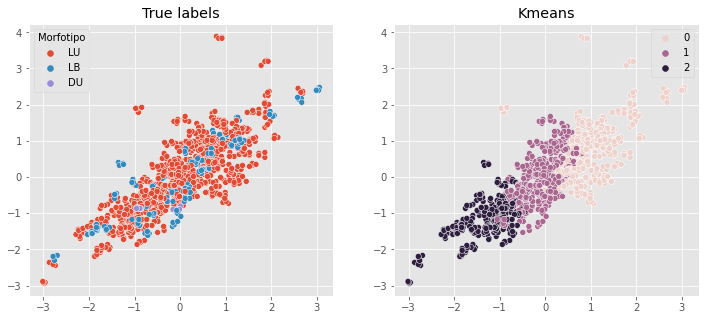

In [7]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=labels,ax=ax[1])
ax[1].set_title('Kmeans')

In [8]:
#no puede comparar etiquetas de letras con etiquetas numéricas
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f",yticklabels=['Benigno','Maligno']);

#print(classification_report(y_true,labels))

### Con SOLO 3 de las nuevas variables de Ratio + NV

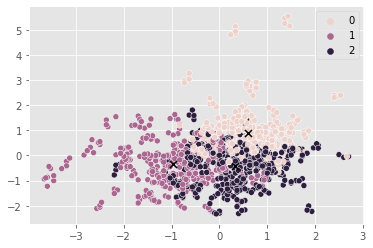

In [9]:
x_R = data[['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_R_scaled=scaler.fit_transform(x_R);

kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_R_scaled)

labels_R = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids_R = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_R_scaled[:,0],y=x_R_scaled[:,1],hue=labels_R,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids_R[:,0],centroids_R[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans_R')

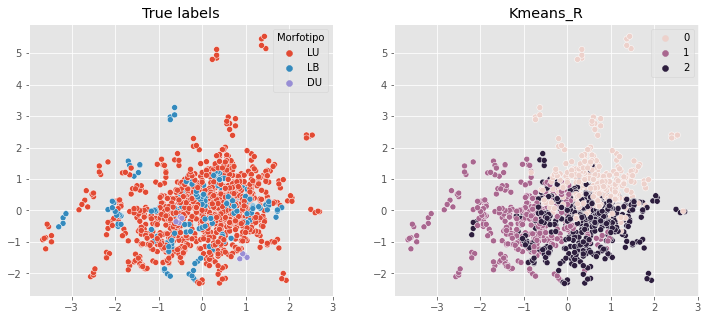

In [10]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=labels_R,ax=ax[1])
ax[1].set_title('Kmeans_R')

### Probamos KMEANS con todas las variables nuevas  + NV

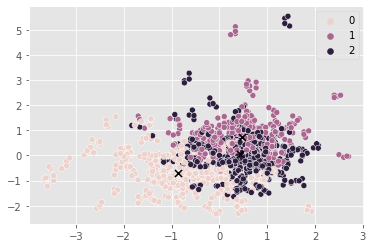

In [11]:
x_R = data[['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT',\
            'Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_R_scaled=scaler.fit_transform(x_R);

kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_R_scaled)

labels_R = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids_R = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_R_scaled[:,0],y=x_R_scaled[:,1],hue=labels_R,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids_R[:,0],centroids_R[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans_R')

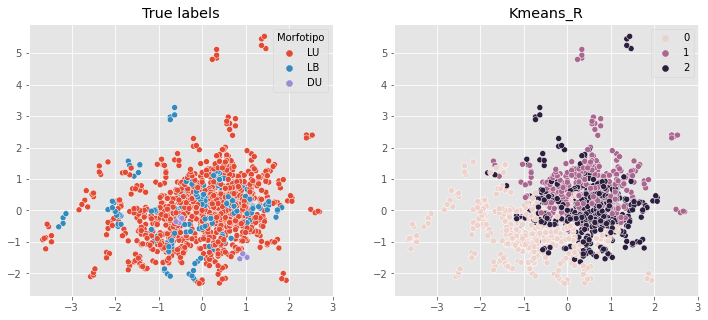

In [12]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=labels_R,ax=ax[1])
ax[1].set_title('Kmeans_R')

# Tal vez debamos arrancar con clasificación por Arboles